In [1]:
#Import du data set et des libs
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#chargement du jeu de donnees
wine_dataframe = pd.read_csv('datatest.csv', index_col=0)
print(len(wine_dataframe))
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)
wine_dataframe = wine_dataframe.drop('Aromas', axis=1)
wine_dataframe = wine_dataframe.drop('Olphactive', axis=1)


wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].str.replace(';', '')
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].str.replace(';', '')
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].str.replace(';', '')
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].str.replace(';', '')
wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].astype(float)
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].astype(float)
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].astype(float)
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].astype(float)


35218


In [3]:
train_merged_deleted = wine_dataframe[(wine_dataframe['Léger to Puissant'] != 0) |
                               (wine_dataframe['Souple to Tannique'] != 0) |
                               (wine_dataframe['Sec to Moelleux'] != 0) |
                               (wine_dataframe['Doux to Acide'] != 0)]

means = train_merged_deleted.groupby('Cépages').mean()
for i, row in wine_dataframe.iterrows():
    if row['Léger to Puissant'] == 0 and row['Souple to Tannique'] == 0 and row['Sec to Moelleux'] == 0 and row['Doux to Acide'] == 0:
        wine_dataframe.loc[i, 'Léger to Puissant'] = means.loc[row['Cépages'], 'Léger to Puissant']
        wine_dataframe.loc[i, 'Souple to Tannique'] = means.loc[row['Cépages'], 'Souple to Tannique']
        wine_dataframe.loc[i, 'Sec to Moelleux'] = means.loc[row['Cépages'], 'Sec to Moelleux']
        wine_dataframe.loc[i, 'Doux to Acide'] = means.loc[row['Cépages'], 'Doux to Acide']


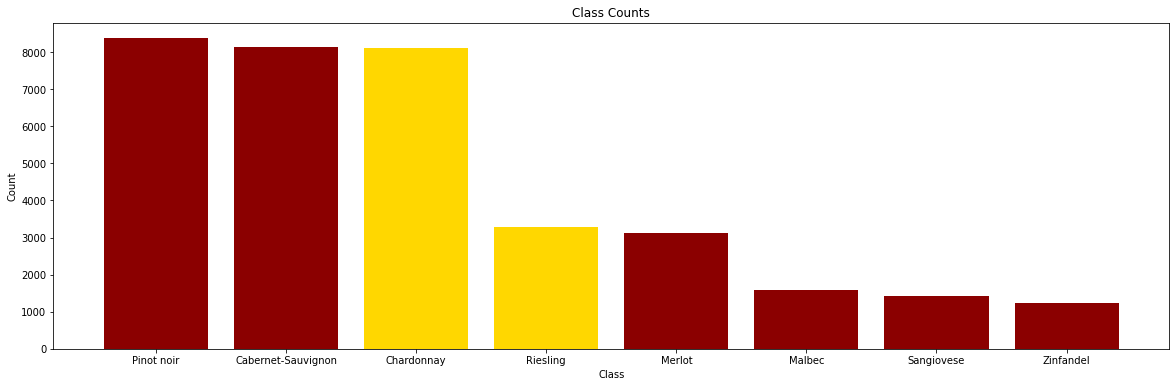

In [4]:
class_counts = wine_dataframe['Cépages'].value_counts()

fig, ax = plt.subplots(figsize=(20, 6))
colors = ['darkred' if x not in ['Chardonnay', 'Riesling'] else 'gold' for x in class_counts.index]
ax.bar(class_counts.index, class_counts.values, color=colors)
plt.title('Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig('wine_value_count.png', dpi=300)
plt.show()

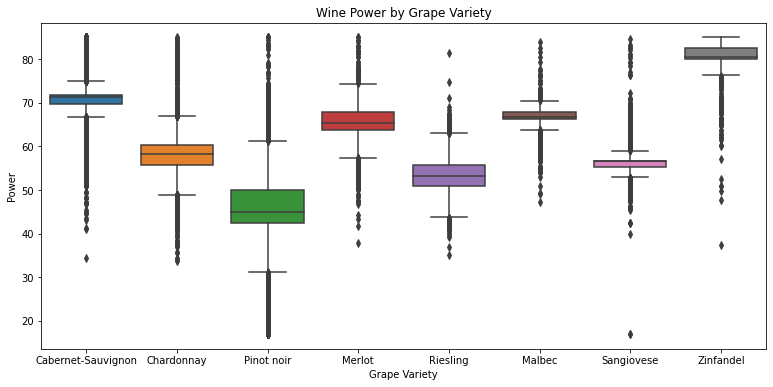

In [5]:
plt.figure(figsize=(13, 6))
sns.boxplot(x="Cépages", y="Léger to Puissant", data=wine_dataframe)

# Set the title and axis labels
plt.title("Wine Power by Grape Variety")
plt.xlabel("Grape Variety")
plt.ylabel("Power")

# Save the plot as an image file
plt.savefig("wine_boxplot_power.png", dpi=300)

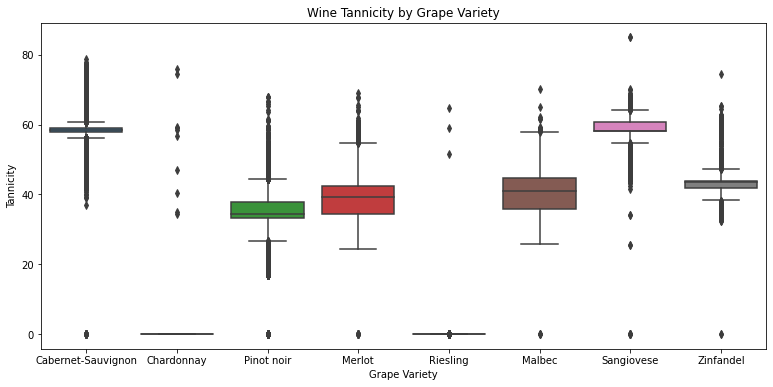

In [6]:
plt.figure(figsize=(13, 6))
sns.boxplot(x="Cépages", y="Souple to Tannique", data=wine_dataframe)

# Set the title and axis labels
plt.title("Wine Tannicity by Grape Variety")
plt.xlabel("Grape Variety")
plt.ylabel("Tannicity")

# Save the plot as an image file
plt.savefig("wine_boxplot_tannicity.png", dpi=300)

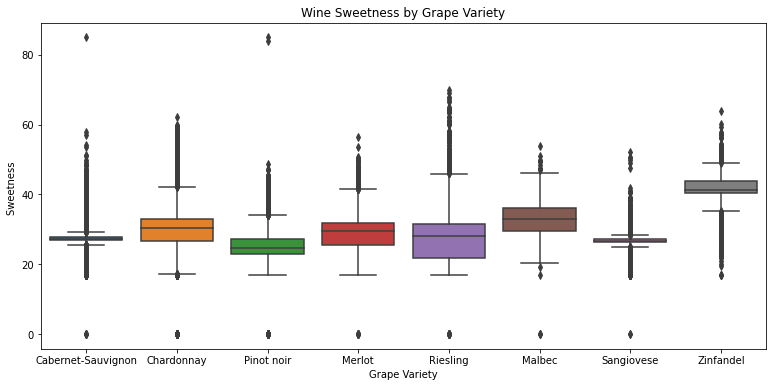

In [7]:
plt.figure(figsize=(13, 6))
sns.boxplot(x="Cépages", y="Sec to Moelleux", data=wine_dataframe)

# Set the title and axis labels
plt.title("Wine Sweetness by Grape Variety")
plt.xlabel("Grape Variety")
plt.ylabel("Sweetness ")

# Save the plot as an image file
plt.savefig("wine_boxplot_sweetness.png",dpi=300)

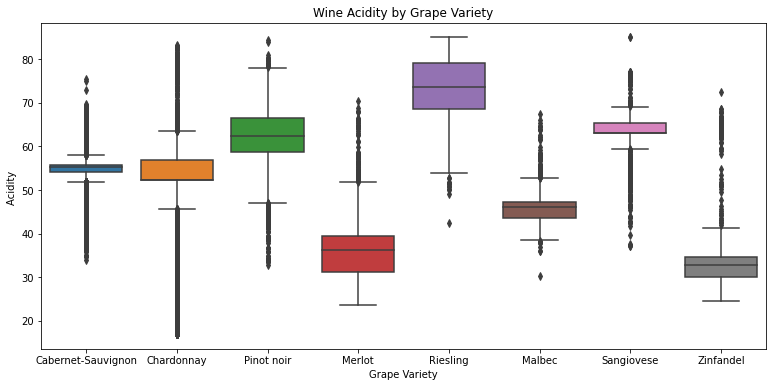

In [8]:
plt.figure(figsize=(13, 6))
sns.boxplot(x="Cépages", y="Doux to Acide", data=wine_dataframe)

# Set the title and axis labels
plt.title("Wine Acidity by Grape Variety")
plt.xlabel("Grape Variety")
plt.ylabel("Acidity ")

# Save the plot as an image file
plt.savefig("wine_boxplot_acidity.png",dpi=300)

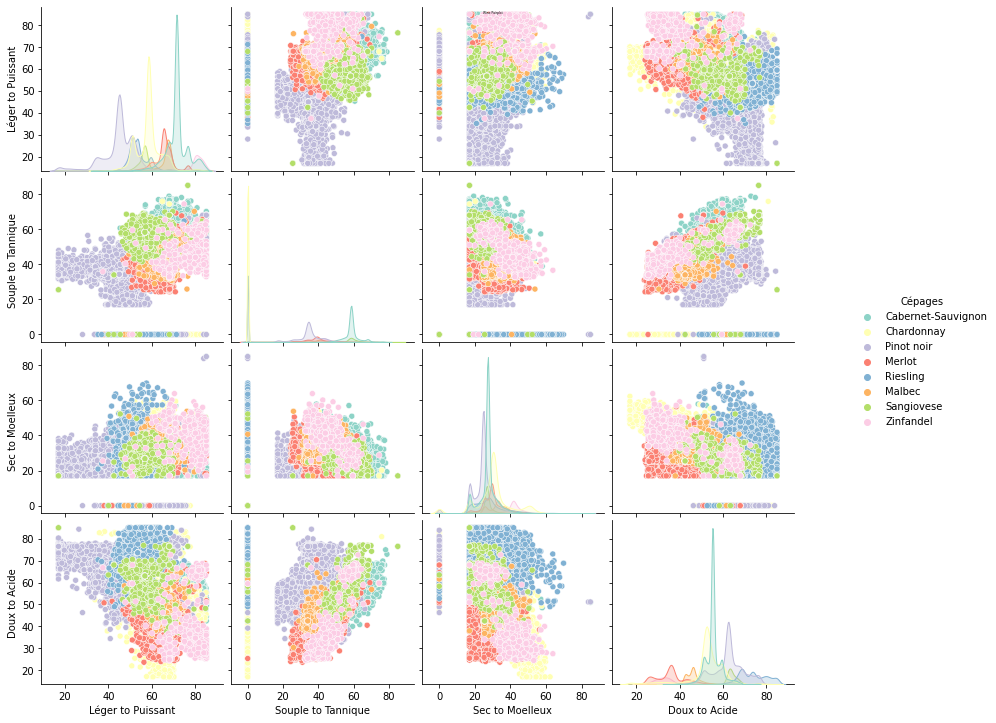

In [9]:
sns.pairplot(wine_dataframe, hue="Cépages", height=3, palette="Set3")
plt.suptitle('Wine Pairplot', size=3)
plt.subplots_adjust(right=0.8, bottom=0.2)

plt.savefig('wine_pairplot.png', dpi=300)

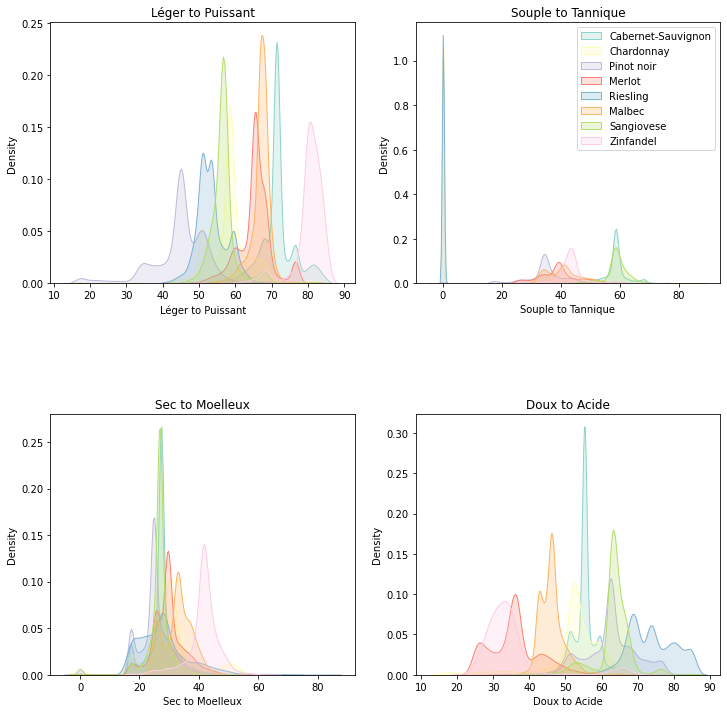

In [25]:
sns.set_palette("Set3")
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

varieties = ['Cabernet-Sauvignon', 'Chardonnay', 'Pinot noir', 'Merlot', 'Riesling', 'Malbec', 'Sangiovese', 'Zinfandel']

for i, col in enumerate(wine_dataframe.columns[:4]):
    for variety in varieties:
        sns.kdeplot(wine_dataframe.loc[wine_dataframe['Cépages'] == variety, col], palette="Set3", label=variety, ax=axes[i//2][i%2],shade=True)

    axes[i//2][i%2].set_title(col)
    
    if i == 1:
        axes[i//2][i%2].legend(loc='upper right')

fig.subplots_adjust(hspace=0.5)

plt.savefig('wine_density.png',dpi=300)
plt.show()


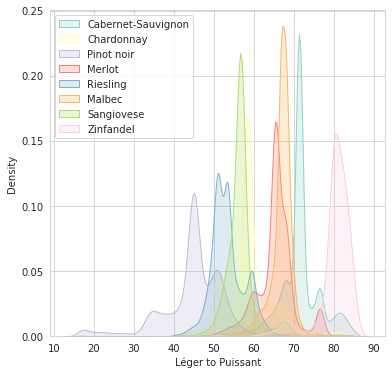

In [51]:
sns.set_palette("Set3")
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

varieties = ['Cabernet-Sauvignon', 'Chardonnay', 'Pinot noir', 'Merlot', 'Riesling', 'Malbec', 'Sangiovese', 'Zinfandel']

for i, col in enumerate(wine_dataframe.columns[:1]):
    for variety in varieties:
        sns.kdeplot(wine_dataframe.loc[wine_dataframe['Cépages'] == variety, col], 
                    palette="Set3", label=variety, shade=True)

    if i == 0:
        plt.legend(loc='upper left')

fig.subplots_adjust(hspace=0.5)
#plt.savefig('wine_Power_density.png', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


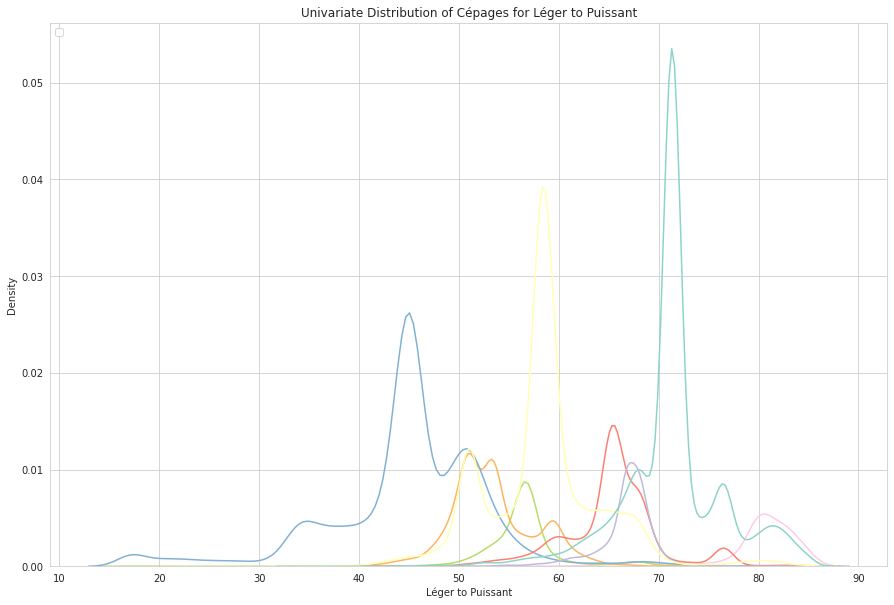

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'wine_dataframe' is already loaded and available

# Set the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Create a kdeplot of 'Léger to Puissant' for each category in 'Cépages'
sns.kdeplot(data=wine_dataframe, x='Léger to Puissant', hue='Cépages', fill=False)

# Move the legend to the upper left
plt.legend(loc='upper left')


# Set the title of the plot
plt.title('Univariate Distribution of Cépages for Léger to Puissant')

# Display the plot
plt.show()




In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

for label in wine_dataframe['Cépages'].unique():

    x = wine_dataframe.loc[wine_dataframe['Cépages'] == label, 'Léger to Puissant']
    
    density = sns.kdeplot(data=wine_dataframe, x='Léger to Puissant', hue='Cépages', fill=False).get_lines()[0].get_data()
    
    area = np.trapz(density[1], density[0])
    print(f"The area under the curve for {label} is {area:.2f}")

plt.show()

The area under the curve for Cabernet-Sauvignon is 1.00
The area under the curve for Chardonnay is 1.00
The area under the curve for Pinot noir is 1.00
The area under the curve for Merlot is 1.00
The area under the curve for Riesling is 1.00
The area under the curve for Malbec is 1.00
The area under the curve for Sangiovese is 1.00
The area under the curve for Zinfandel is 1.00


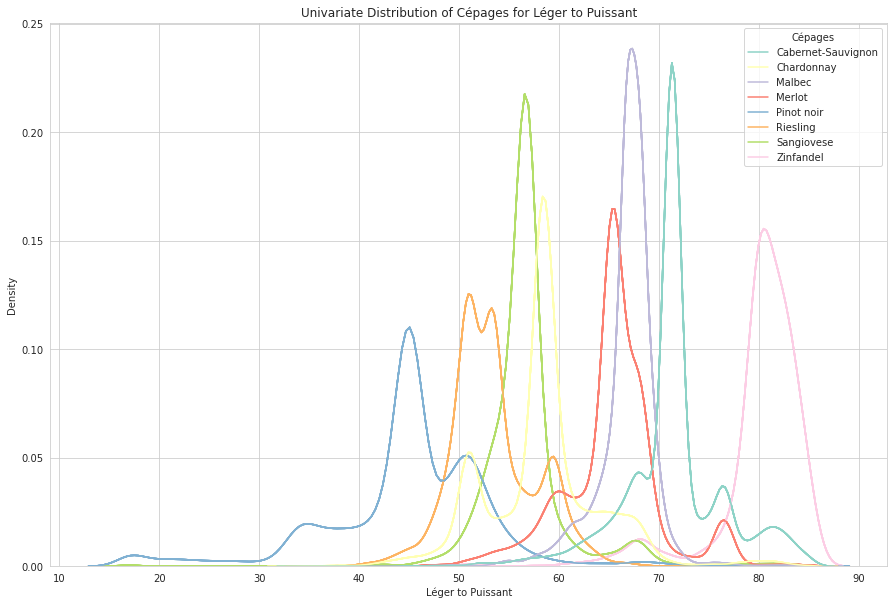

In [88]:
fig, ax = plt.subplots(figsize=(15, 10))

for label in wine_dataframe['Cépages'].unique():

    x = wine_dataframe.loc[wine_dataframe['Cépages'] == label, 'Léger to Puissant']
    
    density = sns.kdeplot(data=wine_dataframe, x='Léger to Puissant', hue='Cépages', fill=False,common_norm=False).get_lines()[0].get_data()
    
    area = np.trapz(density[1], density[0])
    print(f"The area under the curve for {label} is {area:.2f}")

plt.show()

The area under the curve for Cabernet-Sauvignon is 1.00
The area under the curve for Chardonnay is 1.00
The area under the curve for Pinot noir is 1.00
The area under the curve for Merlot is 1.00
The area under the curve for Riesling is 1.00
The area under the curve for Malbec is 1.00
The area under the curve for Sangiovese is 1.00
The area under the curve for Zinfandel is 1.00


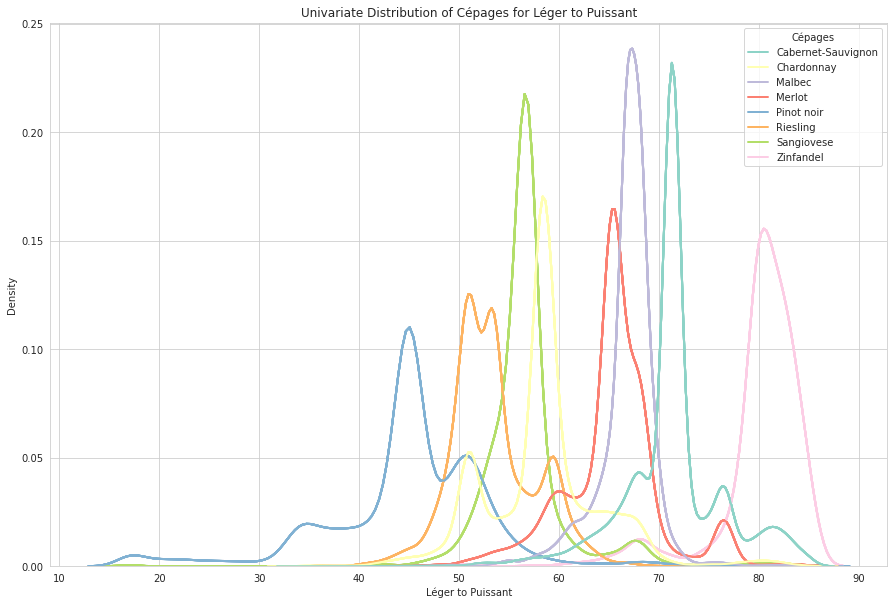

In [76]:
# Set the figure size
fig, ax = plt.subplots(figsize=(15, 10))

# Iterate over each label in the 'Cépages' column
for label in wine_dataframe['Cépages'].unique():
    # Get the data for the current label
    x = wine_dataframe.loc[wine_dataframe['Cépages'] == label, 'Léger to Puissant']
    
    # Compute the density estimate for the current label
    density = sns.kdeplot(data=wine_dataframe, x='Léger to Puissant', hue='Cépages', fill=False,
                          common_norm=False, alpha=0.2, linewidth=2).get_lines()[0].get_data()
    
    # Compute the area under the curve for the current label
    area = np.trapz(density[1], density[0])
    print(f"The area under the curve for {label} is {area:.2f}")

# Set the title of the plot
plt.title('Univariate Distribution of Cépages for Léger to Puissant')

# Display the plot
plt.show()


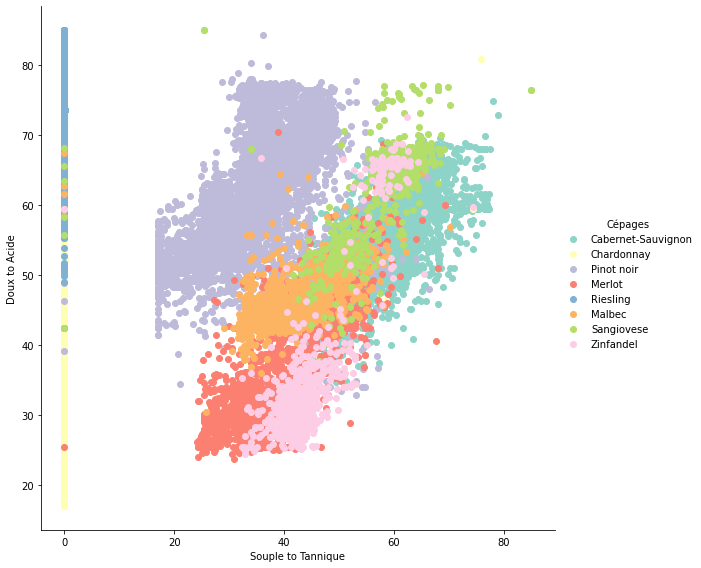

In [11]:
sns.FacetGrid(wine_dataframe, hue="Cépages", height=8, palette="Set3") \
   .map(plt.scatter, "Souple to Tannique", "Doux to Acide") \
   .add_legend()
plt.savefig('wine_Acidity_Tannicity.png',dpi=300)

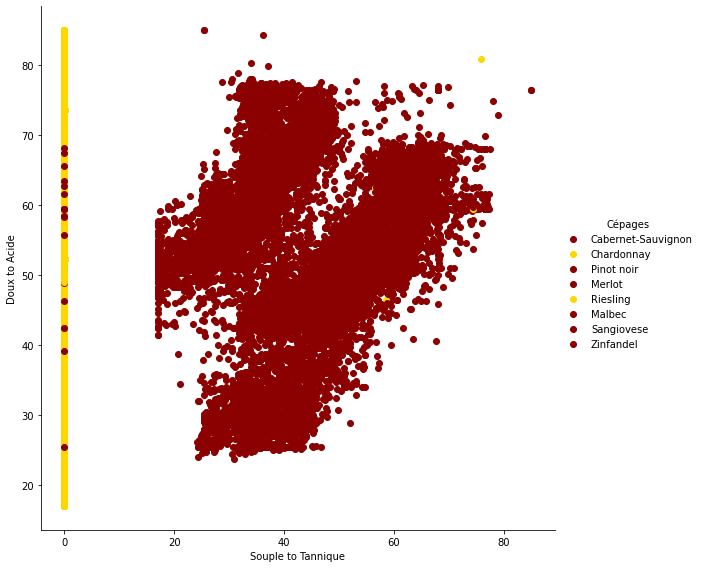

In [12]:
# Create dictionary of color options
palette = {"Cabernet-Sauvignon": "darkred", 
           "Chardonnay": "gold",
           "Pinot noir": "darkred", 
           "Merlot": "darkred", 
           "Riesling": "gold", 
           "Malbec": "darkred",
           "Sangiovese": "darkred",
           "Zinfandel": "darkred"}

# Create FacetGrid with customized color palette
sns.FacetGrid(wine_dataframe, hue="Cépages", height=8, palette=palette) \
   .map(plt.scatter, "Souple to Tannique", "Doux to Acide") \
   .add_legend()
plt.savefig('wine_Tannicity_Acidity_bichrome.png',dpi=300)

In [72]:
#chargement du jeu de donnees
wine_dataframe = pd.read_csv('datatest.csv', index_col=0)
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)
wine_dataframe = wine_dataframe.drop('Léger to Puissant', axis=1)
wine_dataframe = wine_dataframe.drop('Souple to Tannique', axis=1)
wine_dataframe = wine_dataframe.drop('Sec to Moelleux', axis=1)
wine_dataframe = wine_dataframe.drop('Doux to Acide', axis=1)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('/+', '+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace(',+', '+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('/+', '+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace(',+', '+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã©', 'é')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã‰', 'é')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã©', 'é')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã‰', 'é')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lower()
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lower()
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lstrip('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lstrip('+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.split('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.split('+')

wine_dataframe['Aromas'] = wine_dataframe['Aromas'].apply(lambda x: [] if isinstance(x, float) else x)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].apply(lambda x: [] if isinstance(x, float) else x)
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Aromas_one_hot_encoded = mlb.fit_transform(wine_dataframe['Aromas'])
Aromas_df_encoded = pd.DataFrame(Aromas_one_hot_encoded, columns=mlb.classes_)
Olphactive_one_hot_encoded = mlb.fit_transform(wine_dataframe['Olphactive'])
Olphactive_df_encoded = pd.DataFrame(Olphactive_one_hot_encoded, columns=mlb.classes_)
df_concatenated_0 = pd.concat([wine_dataframe, Aromas_df_encoded], axis=1)
df_concatenated = pd.concat([df_concatenated_0, Olphactive_df_encoded], axis=1)

df_concatenated.drop('Aromas', axis=1, inplace=True)
df_concatenated.drop('Olphactive', axis=1, inplace=True)
df_concatenated = df_concatenated.loc[:, ~df_concatenated.columns.duplicated()]
# count the number of observations per variety
counts = df_concatenated['Cépages'].value_counts()
print(counts)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


Pinot noir            8378
Cabernet-Sauvignon    8127
Chardonnay            8108
Riesling              3274
Merlot                3111
Malbec                1582
Sangiovese            1414
Zinfandel             1224
Name: Cépages, dtype: int64


In [67]:
df_concatenated.head(5)

,Cépages,acacia,amande amère,aneth,anis,anis étoilé,anisé,ardoise,asperge,balsamique,...,tabacs sucrés,tangerine,toasté,tomate,tropical,zeste d'agrume,zeste d'orange,zeste de lime,épicé,évolution (vieillissement)
0,Cabernet-Sauvignon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cabernet-Sauvignon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cabernet-Sauvignon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cabernet-Sauvignon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cabernet-Sauvignon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


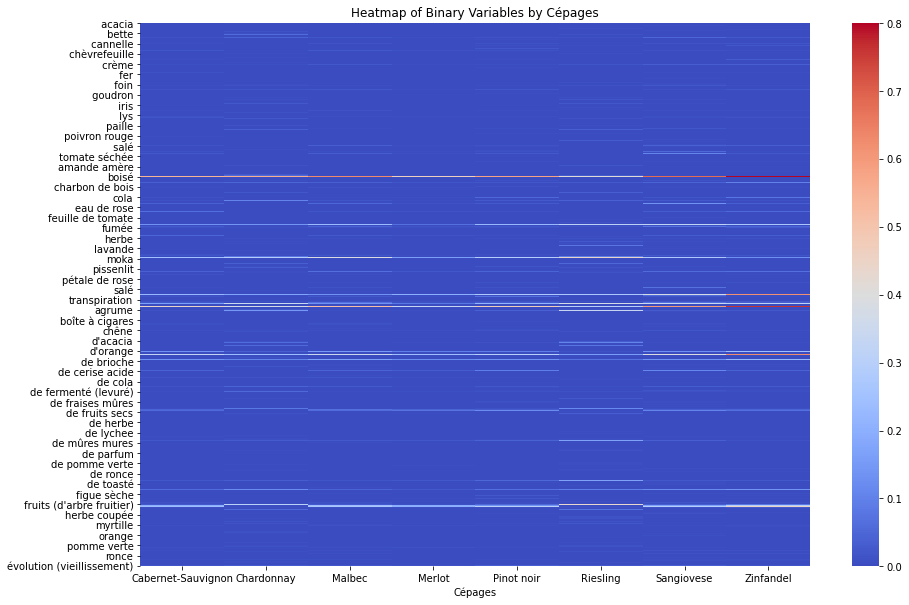

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(df_concatenated.groupby('Cépages').mean().T, cmap='coolwarm')
plt.title('Heatmap of Binary Variables by Cépages')
plt.show()

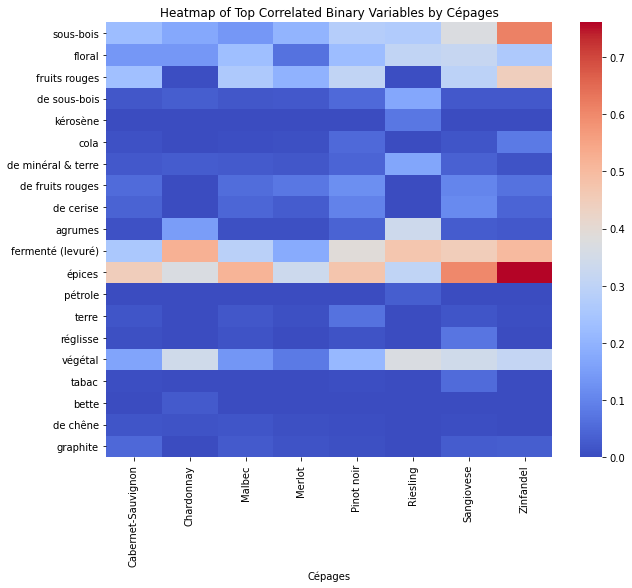

<Figure size 432x288 with 0 Axes>

In [5]:
df_concatenated['Cépages'] = df_concatenated['Cépages'].astype('category')
corr = df_concatenated.drop('Cépages', axis=1).apply(lambda x: x.corr(df_concatenated['Cépages'].cat.codes))
n = 20 
threshold = 0.05 
top_vars = corr[abs(corr) > threshold].sort_values(ascending=False)[:n].index
df_top_vars = df_concatenated[top_vars]
df_top_vars = df_concatenated.loc[:, ['Cépages'] + list(top_vars)]
plt.figure(figsize=(10,8))
sns.heatmap(df_top_vars.groupby('Cépages').mean().T, cmap='coolwarm')
plt.title('Heatmap of Top Correlated Binary Variables by Cépages')
plt.show()
plt.savefig('wine_heatmap.png',dpi=300)

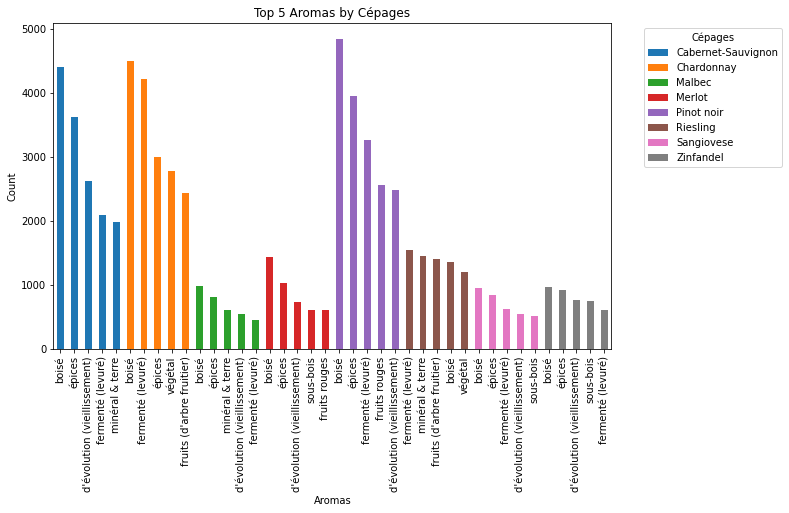

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'df'
# Group by 'Cépages' and sum the binary columns
grouped = df_concatenated.groupby('Cépages').sum()

# Get the top 5 aromas for each group
top5 = pd.DataFrame()
for group in grouped.index:
    top5 = top5.append(grouped.loc[[group]].T.nlargest(5, group).reset_index())

# Plot a stacked bar chart of the top 5 aromas for each group
top5.plot(kind='bar', stacked=True, x='index', figsize=(10,6))
plt.xlabel('Aromas')
plt.ylabel('Count')
plt.title('Top 5 Aromas by Cépages')
plt.legend(title='Cépages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


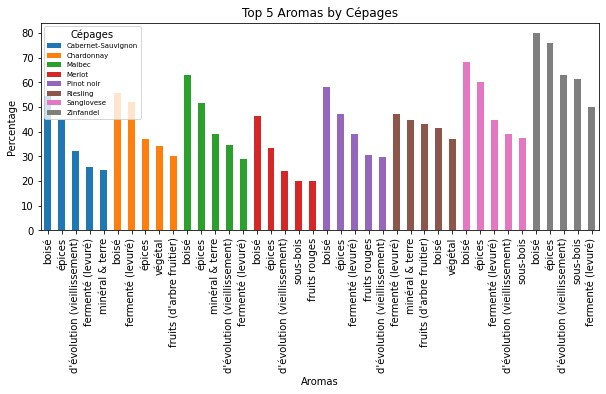

In [8]:
# Assuming your dataframe is called 'df'
# Group by 'Cépages' and sum the binary columns
grouped = df_concatenated.groupby('Cépages').sum()

# Calculate the total number of observations for each group
total_obs = df_concatenated.groupby('Cépages').size()

# Get the top 5 aromas for each group
top5 = pd.DataFrame()
for group in grouped.index:
    # Calculate the percentage of each aroma for each group
    perc = grouped.loc[group] / total_obs[group] * 100
    top5 = top5.append(perc.nlargest(5).reset_index())

# Plot a stacked bar chart of the top 5 aromas for each group
top5.plot(kind='bar', stacked=True, x='index', figsize=(10,6))
plt.xlabel('Aromas')
plt.ylabel('Percentage')
plt.title('Top 5 Aromas by Cépages')
plt.legend(title='Cépages', loc='upper left', fontsize=7)
plt.subplots_adjust(bottom=0.4)

plt.savefig('wine_aromas.png', dpi=300)

plt.show()


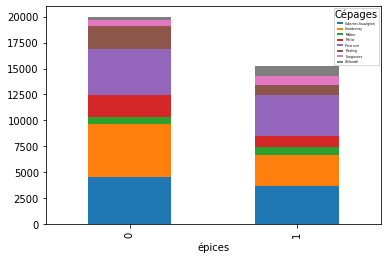

In [13]:
pd.crosstab(df_concatenated['épices'],df_concatenated['Cépages']).plot.bar(stacked=True)
plt.legend(title='Cépages', loc='upper right', fontsize=3)


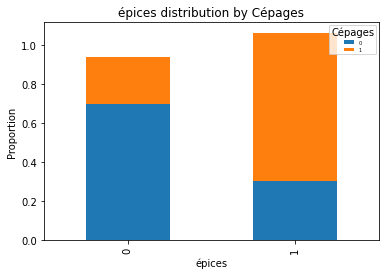

In [19]:

ct = pd.crosstab(df_concatenated['épices'], df_concatenated['minéral & terre'])

# Normalize the crosstab by dividing each value by the sum of values for that class
ct_norm = ct.div(ct.sum(axis=0), axis=1)

# Plot the normalized crosstab
ct_norm.plot(kind='bar', stacked=True)
plt.legend(title='Cépages', loc='upper right', fontsize=5)
plt.xlabel('épices')
plt.ylabel('Proportion')
plt.title('épices distribution by Cépages')
plt.show()

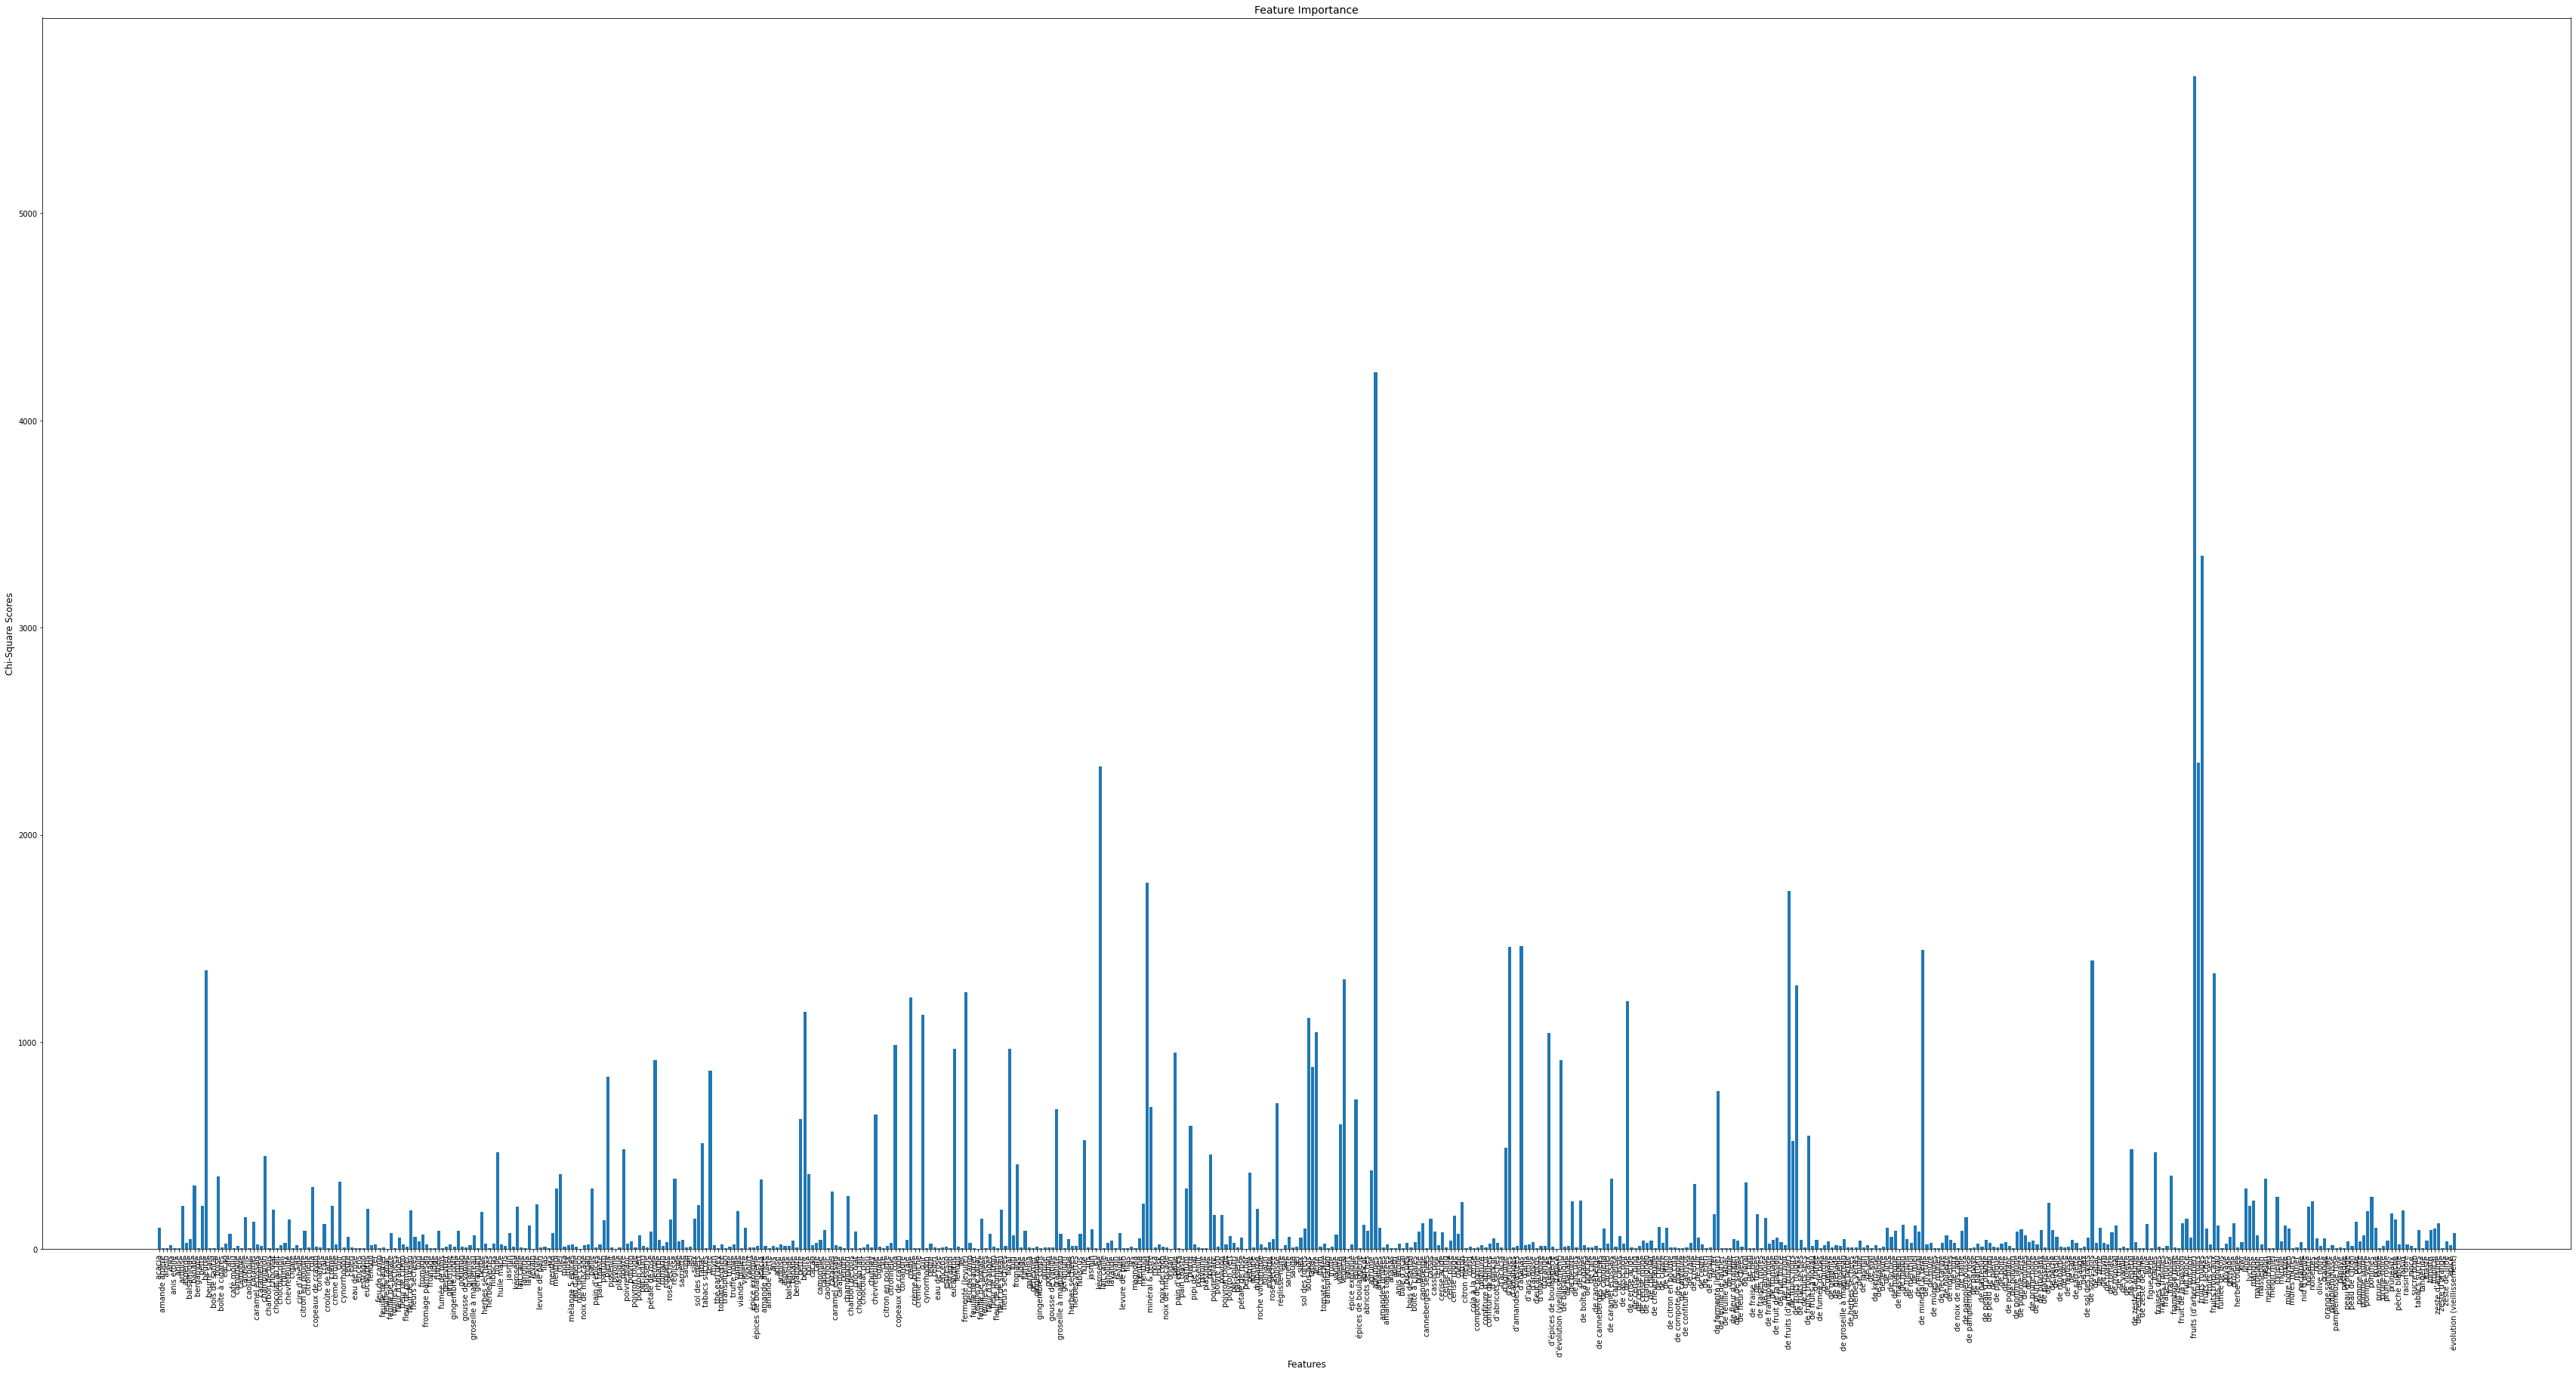

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df = df_concatenated
X = df.drop('Cépages', axis=1)
y = df['Cépages']
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Set figure size to 12x6
plt.figure(figsize=(60, 30))

# Plot a bar chart of the feature scores
scores = selector.scores_
plt.bar(range(len(scores)), scores)
plt.xticks(range(len(scores)), X.columns, rotation=90, fontsize=10)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Chi-Square Scores', fontsize=12)
plt.title('Feature Importance', fontsize=14)
plt.savefig('wine_feature.png', dpi=300)
plt.show()


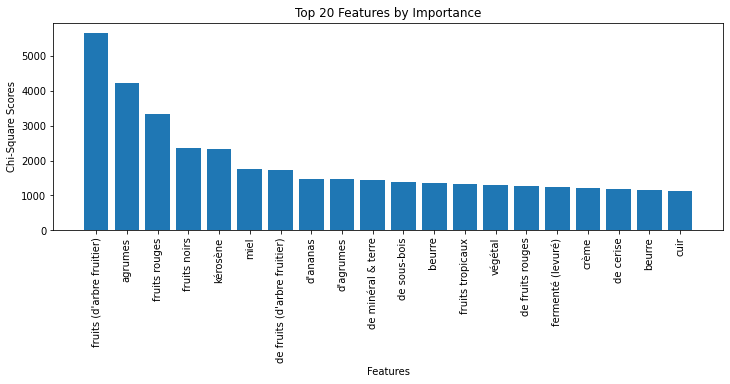

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df = df_concatenated
X = df.drop('Cépages', axis=1)
y = df['Cépages']
selector = SelectKBest(score_func=chi2, k=20)  # select top 20 features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

scores = selector.scores_
idxs = range(len(scores))

top_idxs = sorted(idxs, key=lambda i: scores[i], reverse=True)[:20]
top_scores = [scores[i] for i in top_idxs]
top_features = [X.columns[i] for i in top_idxs]

plt.figure(figsize=(12, 6))  
plt.bar(range(len(top_scores)), top_scores)
plt.xticks(range(len(top_scores)), top_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Chi-Square Scores')
plt.title('Top 20 Features by Importance')
plt.subplots_adjust(bottom=0.4)
plt.savefig('wine_feature_importance.png', dpi=300)
plt.show()


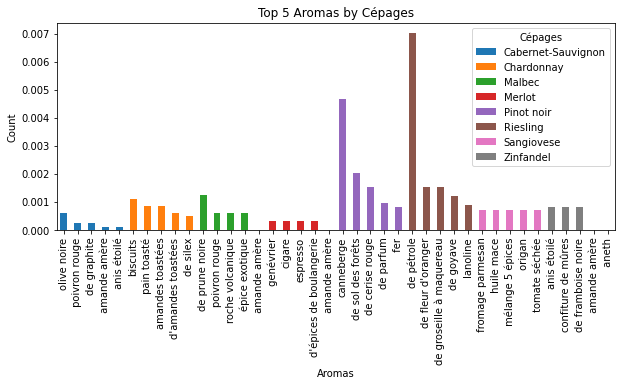

In [75]:
# group by cépages and calculate the percentage of presence for each aroma
grouped = df_concatenated.groupby('Cépages').mean()
aromas = grouped.columns[(grouped > 0).sum() <= 1]
top5 = pd.DataFrame()
for group in grouped.index:
    top5 = top5.append(grouped.loc[[group], aromas].T.nlargest(5, group).reset_index())
    
top5.plot(kind='bar', stacked=True, x='index', figsize=(10,6))
plt.xlabel('Aromas')
plt.ylabel('Count')
plt.title('Top 5 Aromas by Cépages')
plt.legend(title='Cépages', loc='upper right', fontsize=10)
plt.subplots_adjust(bottom=0.4)
plt.savefig('wine_unique_aroma.png', dpi=300)
plt.show()

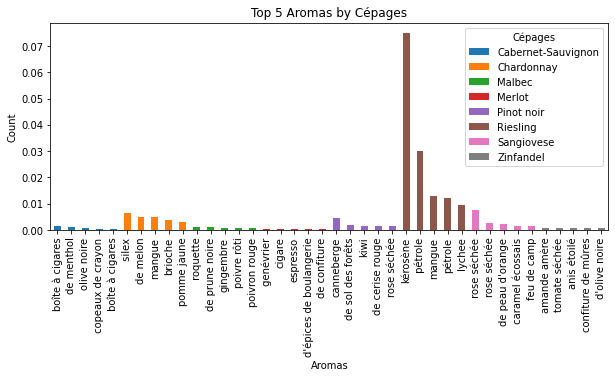

In [76]:
grouped = df_concatenated.groupby('Cépages').mean()
aromas = grouped.columns[(grouped > 0).sum() <= 2]
top5 = pd.DataFrame()
for group in grouped.index:
    top5 = top5.append(grouped.loc[[group], aromas].T.nlargest(5, group).reset_index())
    
top5.plot(kind='bar', stacked=True, x='index', figsize=(10,6))
plt.xlabel('Aromas')
plt.ylabel('Count')
plt.title('Top 5 Aromas by Cépages')
plt.legend(title='Cépages', loc='upper right', fontsize=10)
plt.subplots_adjust(bottom=0.4)
plt.savefig('wine_double_aroma.png', dpi=300)
plt.show()


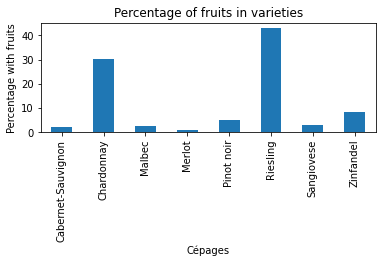

In [18]:
grouped = df.groupby('Cépages')['fruits (d\'arbre fruitier)'].mean() * 100
grouped.plot(kind='bar')
plt.title('Percentage of fruits in varieties')
plt.xlabel('Cépages')
plt.ylabel('Percentage with fruits')
plt.subplots_adjust(bottom=0.5)
plt.savefig('wine_fruit.png', dpi=300)
plt.show()

In [60]:
#chargement du jeu de donnees
wine_dataframe = pd.read_csv('modified_datatest.csv', index_col=0)
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe[wine_dataframe['Red'] != 0]
wine_dataframe = wine_dataframe.drop('Red', axis=1)
wine_dataframe = wine_dataframe.reset_index()
wine_dataframe = wine_dataframe.drop('Unnamed: 0', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)
wine_dataframe = wine_dataframe.drop('Léger to Puissant', axis=1)
wine_dataframe = wine_dataframe.drop('Souple to Tannique', axis=1)
wine_dataframe = wine_dataframe.drop('Sec to Moelleux', axis=1)
wine_dataframe = wine_dataframe.drop('Doux to Acide', axis=1)
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('/+', '+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace(',+', '+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('/+', '+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace(',+', '+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã©', 'é')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã‰', 'é')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã©', 'é')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã‰', 'é')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lower()
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lower()
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lstrip('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lstrip('+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.split('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.split('+')

wine_dataframe['Aromas'] = wine_dataframe['Aromas'].apply(lambda x: [] if isinstance(x, float) else x)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].apply(lambda x: [] if isinstance(x, float) else x)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()


In [61]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Aromas_one_hot_encoded = mlb.fit_transform(wine_dataframe['Aromas'])
Aromas_df_encoded = pd.DataFrame(Aromas_one_hot_encoded, columns=mlb.classes_)
Olphactive_one_hot_encoded = mlb.fit_transform(wine_dataframe['Olphactive'])
Olphactive_df_encoded = pd.DataFrame(Olphactive_one_hot_encoded, columns=mlb.classes_)

df_concatenated_0 = pd.concat([wine_dataframe, Aromas_df_encoded], axis=1)
df_concatenated = pd.concat([df_concatenated_0, Olphactive_df_encoded], axis=1)

df_concatenated.drop('Aromas', axis=1, inplace=True)
df_concatenated.drop('Olphactive', axis=1, inplace=True)
df_concatenated = df_concatenated.loc[:, ~df_concatenated.columns.duplicated()]

In [62]:
df_concatenated

,Cépages,acacia,amande amère,aneth,anis,anis étoilé,anisé,asperge,balsamique,banane,...,raisin,raisin doré,ronce,tabacs sucrés,toasté,tomate,tropical,zeste d'agrume,épicé,évolution (vieillissement)
0,Cabernet-Sauvignon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cabernet-Sauvignon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cabernet-Sauvignon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cabernet-Sauvignon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cabernet-Sauvignon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23831,Zinfandel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23832,Zinfandel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23833,Zinfandel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23834,Zinfandel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


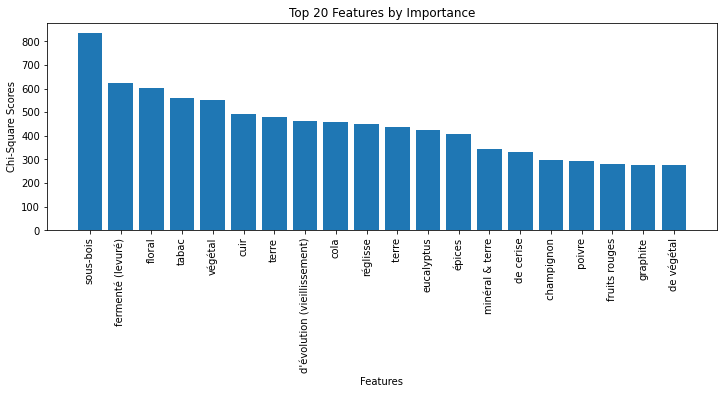

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df = df_concatenated
X = df.drop('Cépages', axis=1)
y = df['Cépages']
selector = SelectKBest(score_func=chi2, k=20)  # select top 20 features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

scores = selector.scores_
idxs = range(len(scores))

top_idxs = sorted(idxs, key=lambda i: scores[i], reverse=True)[:20]
top_scores = [scores[i] for i in top_idxs]
top_features = [X.columns[i] for i in top_idxs]

plt.figure(figsize=(12, 6))  
plt.bar(range(len(top_scores)), top_scores)
plt.xticks(range(len(top_scores)), top_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Chi-Square Scores')
plt.title('Top 20 Features by Importance')
plt.subplots_adjust(bottom=0.4)
plt.savefig('wine_red_feature_importance.png', dpi=300)
plt.show()



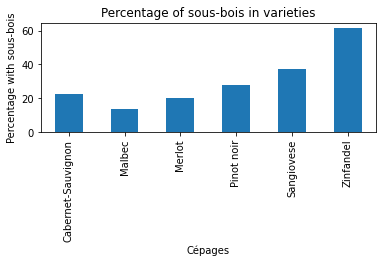

In [65]:
grouped = df.groupby('Cépages')['sous-bois'].mean() * 100
grouped.plot(kind='bar')
plt.title('Percentage of sous-bois in varieties')
plt.xlabel('Cépages')
plt.ylabel('Percentage with sous-bois')
plt.subplots_adjust(bottom=0.5)
plt.savefig('wine_sousbois.png', dpi=300)
plt.show()